# Projet SD-TSIA204

## Imports

In [167]:
# Change here using YOUR own first and last names
fn1 = "mohamedali"
ln1 = "srir"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

print(filename)


sd-tsia204_lab2_srir_mohamedali.ipynb


In [168]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from random import randint


## Question 1

### Part a

In [169]:
np.random.seed(0)


### Part b

In [170]:
data = pd.read_csv("meatspec.csv")
ndata = np.array(data)

X = ndata[:, :-1]
Y = ndata[:, -1]
Y = Y.reshape(X.shape[0], 1)


Means :

In [171]:
Xmean = X.mean(axis=0)
Xmean


array([2.80856088, 2.81113716, 2.81372679, 2.81636312, 2.81909763,
       2.82198298, 2.82506419, 2.82837512, 2.83194307, 2.83581344,
       2.8399573 , 2.84439047, 2.84915172, 2.85428842, 2.85984386,
       2.86584409, 2.87229107, 2.87924437, 2.88672837, 2.89469135,
       2.90298558, 2.91135828, 2.919562  , 2.92745442, 2.93505944,
       2.94255842, 2.95027526, 2.9585833 , 2.96775809, 2.97788112,
       2.98877242, 3.00007121, 3.0114614 , 3.02291856, 3.03482623,
       3.04781409, 3.06252312, 3.07882953, 3.09621135, 3.11387935,
       3.13089121, 3.14640921, 3.16001433, 3.17194837, 3.18318972,
       3.1952726 , 3.20996851, 3.22932363, 3.25436014, 3.28580605,
       3.32381698, 3.36757651, 3.41494884, 3.46249181, 3.50620688,
       3.54277837, 3.57062833, 3.59025949, 3.60348949, 3.61221693,
       3.61798516, 3.62169028, 3.62364665, 3.62383633, 3.62213609,
       3.61843847, 3.61275763, 3.60520479, 3.59597526, 3.58524688,
       3.57317507, 3.55989567, 3.54553744, 3.53020753, 3.51399

In [172]:
Ymean = Y.mean(axis=0)
Ymean


array([18.14232558])

Standard deviation

In [173]:
Xstd = X.std(axis=0)
Xstd


array([0.40983682, 0.41238972, 0.41493726, 0.41749102, 0.4200601 ,
       0.42264909, 0.4252529 , 0.42786756, 0.43050507, 0.43318362,
       0.43588923, 0.43862949, 0.44141616, 0.44426664, 0.44719531,
       0.45020667, 0.45329831, 0.45648092, 0.45977021, 0.46319139,
       0.46670778, 0.47025775, 0.47375878, 0.47714658, 0.48041988,
       0.48364542, 0.48693688, 0.49048411, 0.49441004, 0.49878081,
       0.50351916, 0.50844873, 0.51335192, 0.51806839, 0.52260459,
       0.52709895, 0.53163437, 0.5361325 , 0.54029243, 0.54368386,
       0.54579716, 0.54621291, 0.54479584, 0.54178668, 0.53775448,
       0.53344636, 0.52957913, 0.52667001, 0.52487777, 0.52419852,
       0.52458189, 0.52592012, 0.52802595, 0.53060441, 0.53332218,
       0.53586217, 0.53799342, 0.53961433, 0.54084325, 0.54172504,
       0.54243339, 0.54299596, 0.54349644, 0.543908  , 0.54422874,
       0.54441634, 0.54450073, 0.54447553, 0.54441914, 0.54432928,
       0.54419787, 0.54403906, 0.54389804, 0.54377646, 0.54361

In [174]:
Ystd = Y.std()
Ystd


12.710633679921688

- The data is not centered, not normalized and not standarized

### Part c

In [175]:
scalerX = StandardScaler()
scalerY = StandardScaler()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

X_train_stand = scalerX.fit_transform(X_train)
Y_train_stand = scalerY.fit_transform(Y_train)

X_test_stand = scalerX.transform(X_test)
Y_test_stand = scalerY.transform(Y_test)


### Part d

In [176]:
ols = linear_model.LinearRegression(fit_intercept=False)
ols.fit(X_train_stand, Y_train_stand)

Y_computed_stand = ols.predict(X_test_stand)

r2_score(Y_test_stand, Y_computed_stand)


0.9600547777969841

We don't need to fit the intercept because the data is centered

### Part e

In [177]:
df_coef = pd.DataFrame({'Models': ["OLS"], 'R2': [0.9600547777969841]})
df_coef


,Models,R2
0,OLS,0.960055


## Question 2

This code is comming from the pseudo code in the Lecture notes

In [178]:
n, p = X_train_stand.shape
G = (X_train_stand.T @ X_train_stand)/n
sig = (np.sum((Y_train_stand - X_train_stand @ ols.coef_.T)**2)/(n-p-1))**0.5

T = np.array([(ols.coef_[0][i])/(sig * (G[i, i]**0.5)) for i in range(100)])


def T(Y, X, k):
    Xk = X[:, k]
    Xk = Xk.reshape(Y.shape)
    n = Xk.shape[0]

    ols = linear_model.LinearRegression(fit_intercept=False)
    ols.fit(Xk, Y)

    theta = ols.coef_

    G = (Xk.T @ Xk)/n
    sigma = np.sum((Y-Xk*theta)**2)/(n-2)

    T = theta / ((G[0, 0]**0.5)*sigma)

    return T[0], Xk, theta[0], 2*(1 - scipy.stats.norm.cdf(T*(n**0.5))[0])


r = Y_train_stand
S = []
A = [i for i in range(X_train_stand.shape[1])]
pvalues = [] # list storing the p-values

while (len(A) != 0):

    V = []

    for k in A:
        a = T(r, X_train_stand, k)[0]
        V.append(a)

    V = np.array(V)
    k = A[np.argmax(abs(V))]

    A.remove(k)
    S.append(k)

    pvalues.append(T(r, X_train_stand, k)[-1])

    r = r - T(r, X_train_stand, k)[1]*T(r, X_train_stand, k)[2]


In [179]:
pvalues = np.array(pvalues)

selected_columns = []
for k in range(len(S)):
    if pvalues[k] < 0.05:
        selected_columns.append(S[k])

selected_columns # list storing the parameters


[40, 39, 41, 38, 42, 37, 36, 97, 43, 35, 96, 98]

## Question 3

### Part a

In [180]:
# X_restricted contains only the selected parameters
X_restricted_train = np.zeros((X_train.shape[0], len(selected_columns)))
X_restricted_test = np.zeros((X_test.shape[0], len(selected_columns)))
for i in range(len(selected_columns)):
    X_restricted_train[:, i] = X_train[:, selected_columns[i]]
    X_restricted_test[:, i] = X_test[:, selected_columns[i]]

scalerR = StandardScaler()
X_restricted_train_stand = scalerR.fit_transform(X_restricted_train)

ols_R = linear_model.LinearRegression(fit_intercept=False)
ols_R.fit(X_restricted_train_stand, Y_train_stand)

X_restricted_test_stand = scalerR.transform(X_restricted_test)
Y_computed_stand = ols_R.predict(X_restricted_test_stand)

r2_score(Y_test_stand, Y_computed_stand)


0.9441689023606026

### Part b

In [181]:
df = pd.DataFrame({'Models': [
                  "OLS with forward variable selection (ols_R)"], 'R2': [0.9441689023606026]})
df_coef = df_coef.append(df)
df_coef


/tmp/ipykernel_5994/1947709524.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_coef = df_coef.append(df)


,Models,R2
0,OLS,0.960055
0,OLS with forward variable selection (ols_R),0.944169


## Question 4

In [182]:
Seq = SequentialFeatureSelector(ols, n_features_to_select=12)


Selected variables :

In [183]:
Seq.fit(X_train_stand, Y_train_stand).get_feature_names_out()


array(['x0', 'x3', 'x19', 'x21', 'x39', 'x40', 'x46', 'x47', 'x48', 'x57',
       'x74', 'x99'], dtype=object)

In [184]:
X_train_seq = Seq.transform(X_train_stand)
X_train_seq.shape

X_test_seq = Seq.transform(X_test_stand)
X_test_seq.shape


(54, 12)

In [185]:
scalerSeq = StandardScaler()
X_seq_train_stand = scalerSeq.fit_transform(X_train_seq)

ols_Seq = linear_model.LinearRegression(fit_intercept=False)
ols_Seq.fit(X_seq_train_stand, Y_train_stand)

X_test_seq_stand = scalerSeq.transform(X_test_seq)
Y_computed_stand = ols_Seq.predict(X_test_seq_stand)

r2_score(Y_test_stand, Y_computed_stand)


0.9572204408872212

In [186]:
df = pd.DataFrame({'Models': [
                  "OLS with SequentialFeatureSelector (ols_Seq)"], 'R2': [0.9572204408872212]})
df_coef = df_coef.append(df)
df_coef


/tmp/ipykernel_5994/2386894353.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_coef = df_coef.append(df)


,Models,R2
0,OLS,0.960055
0,OLS with forward variable selection (ols_R),0.944169
0,OLS with SequentialFeatureSelector (ols_Seq),0.957220


## Question 5 : RIDGE

### Part a

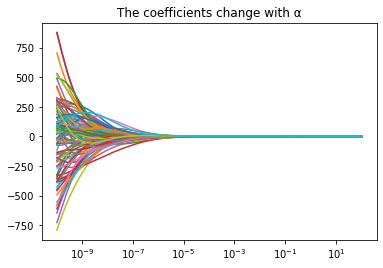

In [187]:
n, p = X_train_stand.shape

step = 10000
alpha_set = np.logspace(-10, 2, step)
theta_ev = np.zeros((p, step))

for i in range(len(alpha_set)):
    theta_ridge = (np.linalg.inv(X_train_stand.T  @ X_train_stand + n *
                   alpha_set[i] * np.identity(p)) @ X_train_stand.T @ Y_train_stand).reshape(100,)
    theta_ev[:, i] = theta_ridge


for param in range(p):
    plt.plot(alpha_set, theta_ev[param, :])
    plt.xscale('log', base=10)

plt.title("The coefficients change with α")
plt.show()


### Part b

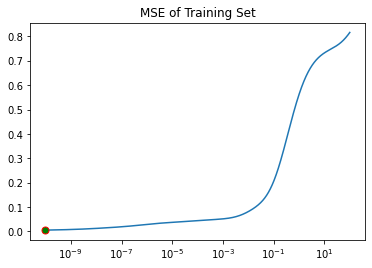

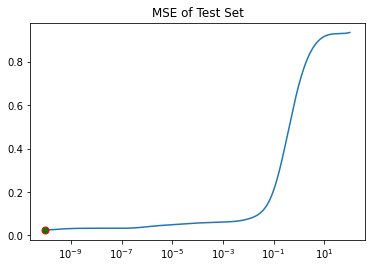

In [188]:
Y_train_ridge_ev = X_train_stand @ theta_ev
MSE_Train = []

for i in range(len(alpha_set)):
    MSE_Train.append(mean_squared_error(Y_train_stand, Y_train_ridge_ev[:, i]))

alpha_Train_min = alpha_set[np.argmin(MSE_Train)]

plt.plot(alpha_set, MSE_Train)
plt.xscale('log', base=10)
plt.title("MSE of Training Set")
plt.plot(alpha_set[np.argmin(MSE_Train)], min(MSE_Train), marker="o",
         markersize=7, markeredgecolor="red", markerfacecolor="green") # Pointing the minimum
plt.show()

Y_test_ridge_ev = X_test_stand @ theta_ev
MSE_Test = []

for i in range(len(alpha_set)):
    MSE_Test.append(mean_squared_error(Y_test_stand, Y_test_ridge_ev[:, i]))

alpha_Test_min = alpha_set[np.argmin(MSE_Test)]

plt.plot(alpha_set, MSE_Test)
plt.xscale('log', base=10)
plt.title("MSE of Test Set")
plt.plot(alpha_set[np.argmin(MSE_Test)], min(MSE_Test), marker="o",
         markersize=7, markeredgecolor="red", markerfacecolor="green") # Pointing the minimum
plt.show()


### Part c

In [189]:
r2_score(Y_test_stand, Y_test_ridge_ev[:, np.argmin(MSE_Train)])


0.9755078109830306

In [190]:
df = pd.DataFrame({'Models': ["Ridge"], 'R2': [0.9755078109830306]})
df_coef = df_coef.append(df)
df_coef


/tmp/ipykernel_5994/2681134593.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_coef = df_coef.append(df)


,Models,R2
0,OLS,0.960055
0,OLS with forward variable selection (ols_R),0.944169
0,OLS with SequentialFeatureSelector (ols_Seq),0.957220
0,Ridge,0.975508


## Question 6 : LASSO

### Part a 

Iteration for minimization increase precision of the decent
Tol sghir maytnegligeach

### Part b

In [191]:
step = 1000
alpha_set = np.logspace(-5, -2, step)
number_diff_null = []
MSE_Train = []
MSE_Test = []
for i in range(len(alpha_set)):

    lasso = linear_model.Lasso(
        alpha_set[i], tol=0.04, max_iter=20000, fit_intercept=False)
    lasso.fit(X_train_stand, Y_train_stand)

    number_diff_null.append(np.sum(lasso.coef_ > 0))
    MSE_Train.append(mean_squared_error(
        Y_train_stand, lasso.predict(X_train_stand)))
    MSE_Test.append(mean_squared_error(
        Y_test_stand, lasso.predict(X_test_stand)))

alpha_Train_min = alpha_set[np.argmin(MSE_Train)]
alpha_Test_min = alpha_set[np.argmin(MSE_Test)]


KeyboardInterrupt: 

### Part c 

Text(0.5, 1.0, 'Number of coefficients that are different from 0 for each value of α')

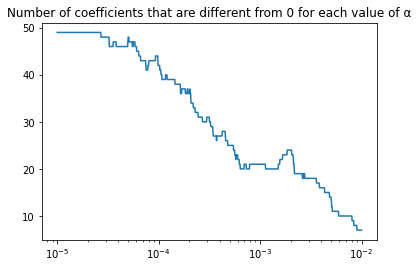

In [ ]:
plt.plot(alpha_set, number_diff_null)
plt.xscale('log', base=10)
plt.title("Number of coefficients that are different from 0 for each value of α")


Text(0.5, 1.0, 'MSE of Test Set')

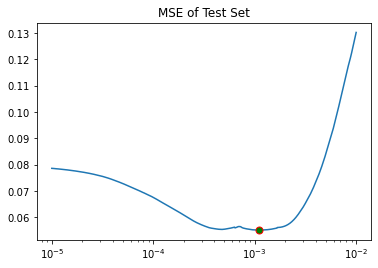

In [ ]:
plt.plot(alpha_set, MSE_Train)
plt.xscale('log', base=10)
plt.plot(alpha_set[np.argmin(MSE_Train)], min(MSE_Train), marker="o",
         markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.title("MSE of Test Set")


Text(0.5, 1.0, 'MSE of Test Set')

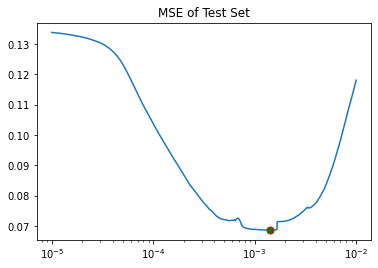

In [ ]:
plt.plot(alpha_set, MSE_Test)
plt.xscale('log', base=10)
plt.plot(alpha_set[np.argmin(MSE_Test)], min(MSE_Test), marker="o",
         markersize=7, markeredgecolor="red", markerfacecolor="green")
plt.title("MSE of Test Set")


### Part d

In [ ]:
lasso = linear_model.Lasso(
    alpha_set[np.argmin(MSE_Train)], tol=0.04, max_iter=20000, fit_intercept=False)
lasso.fit(X_train_stand, Y_train_stand)

r2_score(Y_test_stand, lasso.predict(X_test_stand))


0.9315078114665992

In [ ]:
df = pd.DataFrame({'Models': ["Lasso"], 'R2': [0.9315078114665992]})
df_coef = df_coef.append(df)
df_coef


/tmp/ipykernel_5994/1030145691.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_coef = df_coef.append(df)


,Models,R2
0,OLS,0.960055
0,OLS with forward variable selection (ols_R),0.944169
0,OLS with SequentialFeatureSelector (ols_Seq),0.957220
0,Ridge,0.975508
0,Lasso,0.931508


## Question 7 : Cross Validation

In [ ]:
def Cross_validation(X, Y, model, alpha_set, K=5,MAX_ITER=10000):

    MSE = np.zeros((K, len(alpha_set)))

    j = 0
    for alpha in alpha_set:

        lm = model(alpha, fit_intercept=False, max_iter=MAX_ITER)
        block_size = X.shape[0]//K

        MSE_current = []

        for i in range(K):

            X_current_test = X[i*block_size:(i+1)*block_size, :]
            Y_current_test = Y[i*block_size:(i+1)*block_size, :]

            X_current_train = np.zeros((X.shape[0]-block_size, X.shape[1]))
            Y_current_train = np.zeros((Y.shape[0]-block_size, Y.shape[1]))

            X_current_train[:i*block_size, :] = X[:i*block_size, :]
            Y_current_train[:i*block_size, :] = Y[:i*block_size, :]

            if i != K-1:
                X_current_train[i*block_size:, :] = X[(i+1)*block_size, :]
                Y_current_train[i*block_size:, :] = Y[(i+1)*block_size, :]

            scalerX = StandardScaler()
            scalerY = StandardScaler()

            X_current_train_stand = scalerX.fit_transform(X_current_train)
            Y_current_train_stand = scalerY.fit_transform(Y_current_train)

            lm.fit(X_current_train_stand, Y_current_train_stand)

            X_current_test_stand = scalerX.transform(X_current_test)
            Y_current_test_stand = scalerY.transform(Y_current_test)
            Y_computed_stand = lm.predict(X_current_test_stand)

            MSE_current.append(mean_squared_error(
                Y_current_test_stand, Y_computed_stand))

        MSE[:, j] = MSE_current
        j += 1

    return MSE


### CV with ElasticNet

In [ ]:
alphas = [0.1, 1, 10]
MSE = Cross_validation(X_train, Y_train, linear_model.ElasticNet, alphas, K=4)
alphas[np.argmin(MSE.mean(axis=0))]
print(MSE.mean(axis=0))
print("Best alpha : ", alphas[np.argmin(MSE.mean(axis=0))])



[91.02065133 91.88793371 91.89595066]
Best alpha :  0.1


### CV with Ridge

In [ ]:
alphas = np.logspace(-10,3,1000)
MSE = Cross_validation(X_train, Y_train, linear_model.Ridge, alphas, K=4)
print(MSE.mean(axis=0))
print("Best alpha : ", alphas[np.argmin(MSE.mean(axis=0))])


[91.16963771 91.16771278 91.16646823 91.16536388 91.16602077 91.16394874
 91.16258955 91.16215571 91.1626961  91.16001062 91.15867215 91.15767585
 91.15674645 91.15558259 91.15513948 91.15460939 91.15361406 91.15296795
 91.15156971 91.15101054 91.149877   91.14964757 91.14859684 91.14665893
 91.14645007 91.14518226 91.14491244 91.14333298 91.14364707 91.14271009
 91.14221776 91.14110231 91.14029716 91.139418   91.13833869 91.13807676
 91.13708425 91.13654849 91.13534332 91.13451928 91.13410038 91.13346137
 91.13326223 91.13238338 91.13080261 91.13055689 91.1297356  91.12927374
 91.12826383 91.1278436  91.12725974 91.12595633 91.12555586 91.12485073
 91.12413074 91.12323233 91.12273027 91.12208824 91.12146564 91.12066419
 91.11982015 91.11937859 91.11859591 91.11790205 91.11744786 91.11652989
 91.11582782 91.11527433 91.11474855 91.11403479 91.11311148 91.11266674
 91.11201077 91.11127033 91.11067237 91.11004389 91.10925762 91.10865713
 91.10788763 91.10724287 91.10653189 91.10585977 91

In [ ]:
lm = linear_model.Ridge(alphas[np.argmin(MSE.mean(axis=0))], max_iter=50000)
lm.fit(X_train_stand,Y_train_stand)

Y_computed = lm.predict(X_test_stand)

print("R2 score with this parameter : ", r2_score(Y_test_stand,Y_computed))

R2 score with this parameter :  0.9665241156517946


### CV with Lasso

In [ ]:
alphas = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
MSE = Cross_validation(X_train, Y_train, linear_model.Lasso, alphas, K=4 , MAX_ITER= 10000)
alphas[np.argmin(MSE.mean(axis=0))]
print(MSE.mean(axis=0))
print("Best alpha : ", alphas[np.argmin(MSE.mean(axis=0))])


/tmp/ipykernel_5994/2709707329.py:34: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lm.fit(X_current_train_stand, Y_current_train_stand)
/home/metlouf/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/tmp/ipykernel_5994/2709707329.py:34: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lm.fit(X_current_train_stand, Y_current_train_stand)
/home/metlouf/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/metlouf/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordi

[110.61425611  91.27411749  91.88656219  91.89595066  91.89595066
  91.89595066  91.89595066]
Best alpha :  0.1


/home/metlouf/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.706e+00, tolerance: 1.210e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


## Question 8 : Bootstrap


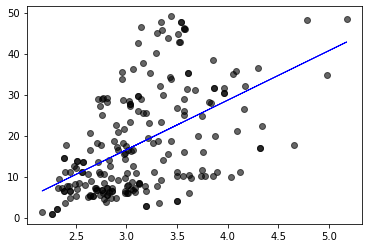

In [196]:
Xb = X
Xb_plot = Xb[:,40].reshape(-1,1)

regr = linear_model.LinearRegression(fit_intercept=True)

regr.fit(Xb_plot, Y)

plt.scatter(Xb_plot, Y, color="black",alpha=0.6)
plt.plot(Xb_plot, regr.predict(Xb_plot), color="blue", linewidth=1)



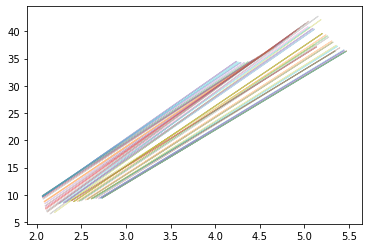

In [197]:
B = 50

for k in range (B):
    
    r = randint(0,99)
    Xb = X[:,r]
    Xb_plot = Xb.reshape(-1,1)
    
    regr = linear_model.LinearRegression()
    regr.fit(Xb_plot, Y)
    plt.plot(Xb_plot, regr.predict(Xb_plot),alpha=0.3, linewidth=1)
        

## Question 9 : PCA


In [ ]:
Cov_Matrix = X_train_stand.T @ X_train_stand
u,s,vh = np.linalg.svd(Cov_Matrix)

### Part a

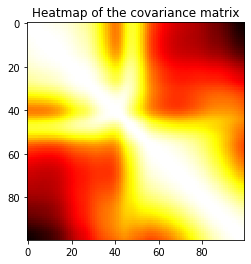

In [ ]:
plt.imshow(Cov_Matrix, cmap='hot', interpolation='nearest')
plt.title("Heatmap of the covariance matrix")
plt.show()

### Part b

In [ ]:
nb_components = 8

U = np.zeros((X_train_stand.shape[1],nb_components))
for col in range(nb_components) :
    U[:,col] = u[:,col]

X_train_PCA = X_train_stand @ U
X_test_PCA = X_test_stand @ U


### Part c

In [ ]:
print("The amount of variance explained by the first k :")
print([s[i]/sum(s) for i in range(nb_components)])

The amount of variance explained by the first k :
[0.9885912998202931, 0.008007408626647762, 0.0023184096832409564, 0.0009801267233599425, 6.501452942184955e-05, 2.63792983979027e-05, 6.625387513263812e-06, 3.2380604346851834e-06]


### Part d 

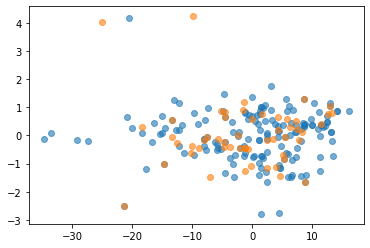

In [ ]:
x_plot = X_train_PCA[:,0]
y_plot = X_train_PCA[:,1]

plt.scatter(x_plot,y_plot,alpha=0.6)

x_plot = X_test_PCA[:,0]
y_plot = X_test_PCA[:,1]

plt.scatter(x_plot,y_plot,alpha=0.6)

plt.show()



### Part e

In [ ]:
ols_pca = linear_model.LinearRegression()
ols_pca.fit(X_train_PCA, Y_train_stand)

Y_computed = ols_pca.predict(X_test_PCA)

r2_score(Y_test_stand, Y_computed)

0.9368350990252545

Find the best nb of components :

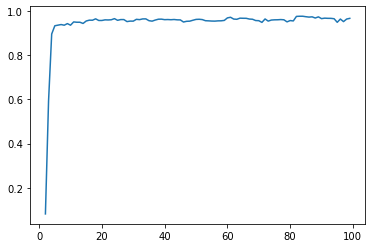

In [ ]:
X_train_PCA_full = X_train_stand @ u
X_test_PCA_full = X_test_stand @ u

nb_components = np.arange(2,100)
r2s = []

for nb in nb_components :
    
    X_train_PCA = X_train_PCA_full[:,:nb]
    X_test_PCA = X_test_PCA_full[:,:nb]

    ols_pca = linear_model.LinearRegression()
    ols_pca.fit(X_train_PCA, Y_train_stand)

    Y_computed = ols_pca.predict(X_test_PCA)

    r2s.append(r2_score(Y_test_stand, Y_computed))


plt.plot(nb_components,r2s)

In [ ]:
print("Best nb_components is : " ,nb_components[np.argmax(r2s)] , "with a score of : ", max(r2s) )

Best nb_components is :  84 with a score of :  0.9774596926598692


In [ ]:
df = pd.DataFrame({'Models': ["Ols after PCA"], 'R2': [0.9774596926598692]})
df_coef = df_coef.append(df)
df_coef

/tmp/ipykernel_5994/1547314443.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_coef = df_coef.append(df)


,Models,R2
0,OLS,0.960055
0,OLS with forward variable selection (ols_R),0.944169
0,OLS with SequentialFeatureSelector (ols_Seq),0.957220
0,Ridge,0.975508
0,Lasso,0.931508
0,Ols after PCA,0.977460


## Question 10 :

We see that the two best models are Ridge and OLS after PCA, we can see the importance of considering specificities of the data (regularization for Ridge and base changement for PCA). We can also see that feature selection is interesting with way less calculation, it gives good results, which could be important if we need speed (real time predictions in embedded systems for example).